# HW #2 [SOLUTION]: Migration Flows for Counties in MN and WI


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## MN & WI Migration Data

  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: MigrationRatio</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Unemployment</li>
          <li>MedianHouseholdIncome</li>
          <li>Poverty</li>

         </ul>
    </ul>
    </td>
    <td width='50%'>&nbsp;</td>
</tr>
</table>



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [2]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

## Read in the data

In [7]:
#@title Read in Data

# Reading data in using read_csv
MN_WI_MigrationData <- read_csv("http://www.StatsClass.org/stat360/Datasets/MN_and_WI_County_Migration.csv")

Rows: 159 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): State, StateAbbrev, County
dbl (7): FIPS, UnemployementRate, MedianHouseholdIncome, PovertyRate, Povert...
num (1): Population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
#@title View the first few rows of data
head(MN_WI_MigrationData)

FIPS  State     StateAbbrev County               UnemployementRate
1 27001 Minnesota MN          Aitkin County, MN    8.2              
2 27003 Minnesota MN          Anoka County, MN     6.4              
3 27005 Minnesota MN          Becker County, MN    6.3              
4 27007 Minnesota MN          Beltrami County, MN  6.4              
5 27009 Minnesota MN          Benton County, MN    6.7              
6 27011 Minnesota MN          Big Stone County, MN 4.8              
  MedianHouseholdIncome PovertyRate PovertyRate_Children Inflow Outflow
1 59064                 12.1        16.1                   893   1489  
2 92249                  6.5         7.6                 22647  23496  
3 67448                 11.8        14.6                  1624   2300  
4 59882                 17.1        19.6                  4453   2804  
5 71493                 13.7        14.0                  3948   3904  
6 57821                 11.8        14.5                   329    370  
  Population
1  15706    
2 363904    
3  35172    
4  46238    
5  41376    
6   5168

Apply a FILTER action to get only MN Counties (Part I of assignment)





---



---



# Computing the new Migration Ratio variable

In [10]:
(MN_WI_MigrationData
  %>% mutate(MigrationRatio = Inflow/Outflow)
) -> MN_WI_MigrationData_withRatio

head(MN_WI_MigrationData_withRatio)

FIPS  State     StateAbbrev County               UnemployementRate
1 27001 Minnesota MN          Aitkin County, MN    8.2              
2 27003 Minnesota MN          Anoka County, MN     6.4              
3 27005 Minnesota MN          Becker County, MN    6.3              
4 27007 Minnesota MN          Beltrami County, MN  6.4              
5 27009 Minnesota MN          Benton County, MN    6.7              
6 27011 Minnesota MN          Big Stone County, MN 4.8              
  MedianHouseholdIncome PovertyRate PovertyRate_Children Inflow Outflow
1 59064                 12.1        16.1                   893   1489  
2 92249                  6.5         7.6                 22647  23496  
3 67448                 11.8        14.6                  1624   2300  
4 59882                 17.1        19.6                  4453   2804  
5 71493                 13.7        14.0                  3948   3904  
6 57821                 11.8        14.5                   329    370  
  Population MigrationRatio
1  15706     0.5997314     
2 363904     0.9638662     
3  35172     0.7060870     
4  46238     1.5880884     
5  41376     1.0112705     
6   5168     0.8891892

# Getting data for MN Only

In [12]:
(MN_WI_MigrationData_withRatio
  %>% filter(State == "Minnesota")
) -> MN_WI_MigrationData_withRatio_MNOnly

head(MN_WI_MigrationData_withRatio_MNOnly)
dim(MN_WI_MigrationData_withRatio_MNOnly)

FIPS  State     StateAbbrev County               UnemployementRate
1 27001 Minnesota MN          Aitkin County, MN    8.2              
2 27003 Minnesota MN          Anoka County, MN     6.4              
3 27005 Minnesota MN          Becker County, MN    6.3              
4 27007 Minnesota MN          Beltrami County, MN  6.4              
5 27009 Minnesota MN          Benton County, MN    6.7              
6 27011 Minnesota MN          Big Stone County, MN 4.8              
  MedianHouseholdIncome PovertyRate PovertyRate_Children Inflow Outflow
1 59064                 12.1        16.1                   893   1489  
2 92249                  6.5         7.6                 22647  23496  
3 67448                 11.8        14.6                  1624   2300  
4 59882                 17.1        19.6                  4453   2804  
5 71493                 13.7        14.0                  3948   3904  
6 57821                 11.8        14.5                   329    370  
  Population MigrationRatio
1  15706     0.5997314     
2 363904     0.9638662     
3  35172     0.7060870     
4  46238     1.5880884     
5  41376     1.0112705     
6   5168     0.8891892

[1] 87 12

## Getting a Scatterplot for MigrationRatio ~ Poverty

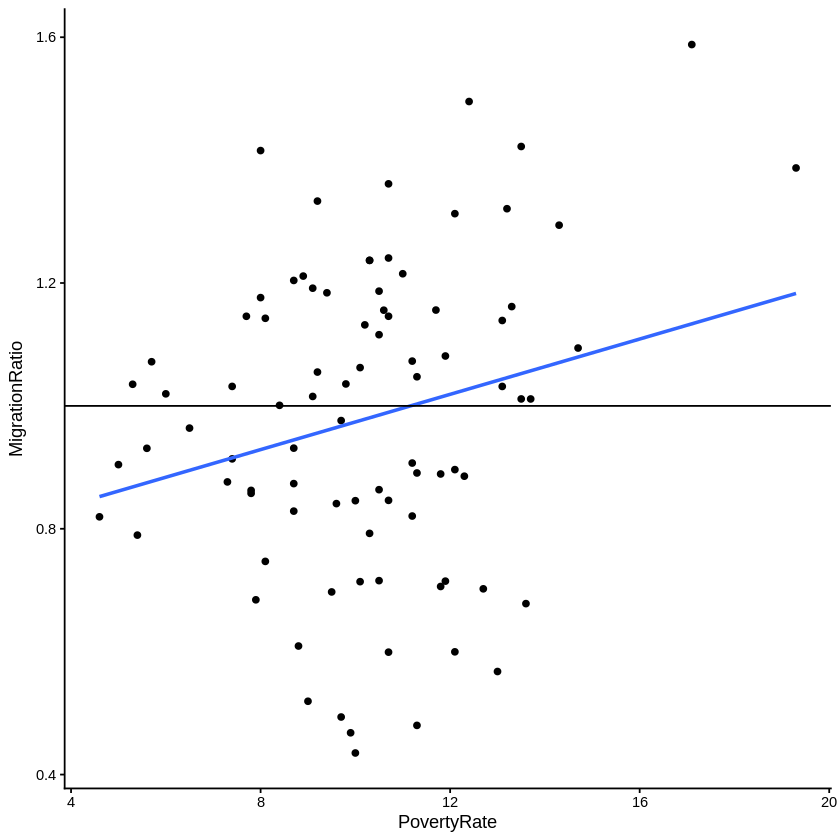

In [17]:
ggplot(data=MN_WI_MigrationData_withRatio_MNOnly, aes(x=PovertyRate, y=MigrationRatio)) +
  geom_point() +
  geom_smooth(method="lm", formula = y ~ x, se=FALSE) +
  geom_abline(intercept=1, slope=0) +
  theme_classic()

## Fitting the simple linear regression model for MigrationRatio ~ Poverty

In [18]:
#Fitting Model #3
LM_MigrationRatio_PovertyRate <- lm(MigrationRatio ~ PovertyRate, data = MN_WI_MigrationData_withRatio_MNOnly)

In [19]:
#Getting the Regression Summaries
summary(LM_MigrationRatio_PovertyRate)


Call:
lm(formula = MigrationRatio ~ PovertyRate, data = MN_WI_MigrationData_withRatio_MNOnly)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53874 -0.13406  0.04306  0.19820  0.48669 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.74890    0.10858   6.897 8.83e-10 ***
PovertyRate  0.02249    0.01032   2.180    0.032 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.247 on 85 degrees of freedom
Multiple R-squared:  0.05295,	Adjusted R-squared:  0.04181 
F-statistic: 4.752 on 1 and 85 DF,  p-value: 0.03203


## Fitting the simple linear regression model for MigrationRatio ~ MedianHouseholdIncome

In [20]:
#Fitting Model #2
LM_MigrationRatio_MedianHouseholdIncome <- lm(MigrationRatio ~ MedianHouseholdIncome, data = MN_WI_MigrationData_withRatio_MNOnly)
summary(LM_MigrationRatio_MedianHouseholdIncome)


Call:
lm(formula = MigrationRatio ~ MedianHouseholdIncome, data = MN_WI_MigrationData_withRatio_MNOnly)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56327 -0.14412  0.02902  0.17349  0.58726 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.105e+00  1.649e-01   6.703 2.12e-09 ***
MedianHouseholdIncome -1.740e-06  2.235e-06  -0.778    0.438    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2529 on 85 degrees of freedom
Multiple R-squared:  0.007079,	Adjusted R-squared:  -0.004602 
F-statistic: 0.606 on 1 and 85 DF,  p-value: 0.4384


## Fitting the simple linear regression model for MigrationRatio ~ UnemploymentRate

In [21]:
#Fitting Model #1
LM_MigrationRatio_UnemployementRate <- lm(MigrationRatio ~ UnemployementRate, data = MN_WI_MigrationData_withRatio_MNOnly)
summary(LM_MigrationRatio_UnemployementRate)


Call:
lm(formula = MigrationRatio ~ UnemployementRate, data = MN_WI_MigrationData_withRatio_MNOnly)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52406 -0.15086  0.01992  0.18452  0.60384 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.88980    0.11190   7.952 7.08e-12 ***
UnemployementRate  0.01476    0.01807   0.817    0.416    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2528 on 85 degrees of freedom
Multiple R-squared:  0.007782,	Adjusted R-squared:  -0.003891 
F-statistic: 0.6667 on 1 and 85 DF,  p-value: 0.4165


# Getting the data for WI only

In [26]:
(MN_WI_MigrationData_withRatio
  %>% filter(State == "Wisconsin")
) -> MN_WI_MigrationData_withRatio_WIOnly

head(MN_WI_MigrationData_withRatio_WIOnly)
dim(MN_WI_MigrationData_withRatio_WIOnly)

FIPS  State     StateAbbrev County              UnemployementRate
1 55001 Wisconsin WI          Adams County, WI    9.8              
2 55003 Wisconsin WI          Ashland County, WI  8.8              
3 55005 Wisconsin WI          Barron County, WI   6.2              
4 55007 Wisconsin WI          Bayfield County, WI 9.4              
5 55009 Wisconsin WI          Brown County, WI    6.2              
6 55011 Wisconsin WI          Buffalo County, WI  7.6              
  MedianHouseholdIncome PovertyRate PovertyRate_Children Inflow Outflow
1 54682                 13.2        20.5                  1761   1398  
2 56848                 14.1        16.9                   707    691  
3 62344                 10.0        11.3                  1933   2596  
4 63680                 10.0        15.9                   629    656  
5 72398                  9.7        10.5                 13039  10789  
6 63969                 10.2        12.2                   977    808  
  Population MigrationRatio
1  20647     1.2596567     
2  16036     1.0231548     
3  46726     0.7446071     
4  16216     0.9588415     
5 268740     1.2085457     
6  13301     1.2091584

[1] 72 12

## Fitting the simple linear regression model for MigrationRatio ~ Poverty

In [27]:
#Fitting Model #3
LM_MigrationRatio_PovertyRate <- lm(MigrationRatio ~ PovertyRate, data = MN_WI_MigrationData_withRatio_WIOnly)

In [28]:
#Getting the Regression Summaries
summary(LM_MigrationRatio_PovertyRate)


Call:
lm(formula = MigrationRatio ~ PovertyRate, data = MN_WI_MigrationData_withRatio_WIOnly)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66591 -0.21854 -0.05716  0.18221  0.98177 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.21835    0.13059   9.330 6.59e-14 ***
PovertyRate -0.01050    0.01163  -0.903     0.37    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3089 on 70 degrees of freedom
Multiple R-squared:  0.01151,	Adjusted R-squared:  -0.002606 
F-statistic: 0.8154 on 1 and 70 DF,  p-value: 0.3696


## Fitting the simple linear regression model for MigrationRatio ~ MedianHouseholdIncome

In [29]:
#Fitting Model #2
LM_MigrationRatio_MedianHouseholdIncome <- lm(MigrationRatio ~ MedianHouseholdIncome, data = MN_WI_MigrationData_withRatio_WIOnly)
summary(LM_MigrationRatio_MedianHouseholdIncome)


Call:
lm(formula = MigrationRatio ~ MedianHouseholdIncome, data = MN_WI_MigrationData_withRatio_WIOnly)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78124 -0.20353 -0.05686  0.18397  0.97050 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           8.658e-01  2.508e-01   3.453 0.000946 ***
MedianHouseholdIncome 3.491e-06  3.620e-06   0.965 0.338099    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3086 on 70 degrees of freedom
Multiple R-squared:  0.01312,	Adjusted R-squared:  -0.0009823 
F-statistic: 0.9303 on 1 and 70 DF,  p-value: 0.3381


## Fitting the simple linear regression model for MigrationRatio ~ UnemploymentRate

In [30]:
#Fitting Model #1
LM_MigrationRatio_UnemployementRate <- lm(MigrationRatio ~ UnemployementRate, data = MN_WI_MigrationData_withRatio_WIOnly)
summary(LM_MigrationRatio_UnemployementRate)


Call:
lm(formula = MigrationRatio ~ UnemployementRate, data = MN_WI_MigrationData_withRatio_WIOnly)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6545 -0.2132 -0.0435  0.1734  0.9565 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.24883    0.13788   9.057 2.08e-13 ***
UnemployementRate -0.02099    0.01943  -1.081    0.284    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3081 on 70 degrees of freedom
Multiple R-squared:  0.0164,	Adjusted R-squared:  0.002354 
F-statistic: 1.168 on 1 and 70 DF,  p-value: 0.2836


# Part III: Investinating the Marginal Distribution

## Analysis for MN

First, getting basic summary statistics

In [33]:
# Marginal Distribution
( MN_WI_MigrationData_withRatio_MNOnly
     %>% summarize(
                    Avg = mean(MigrationRatio),
                    'Standard Deviation' = sd(MigrationRatio),
                    Count = n()
                 )
)

Avg       Standard Deviation Count
1 0.9784473 0.2523011          87

Next, getting a histogram of MigrationRatio

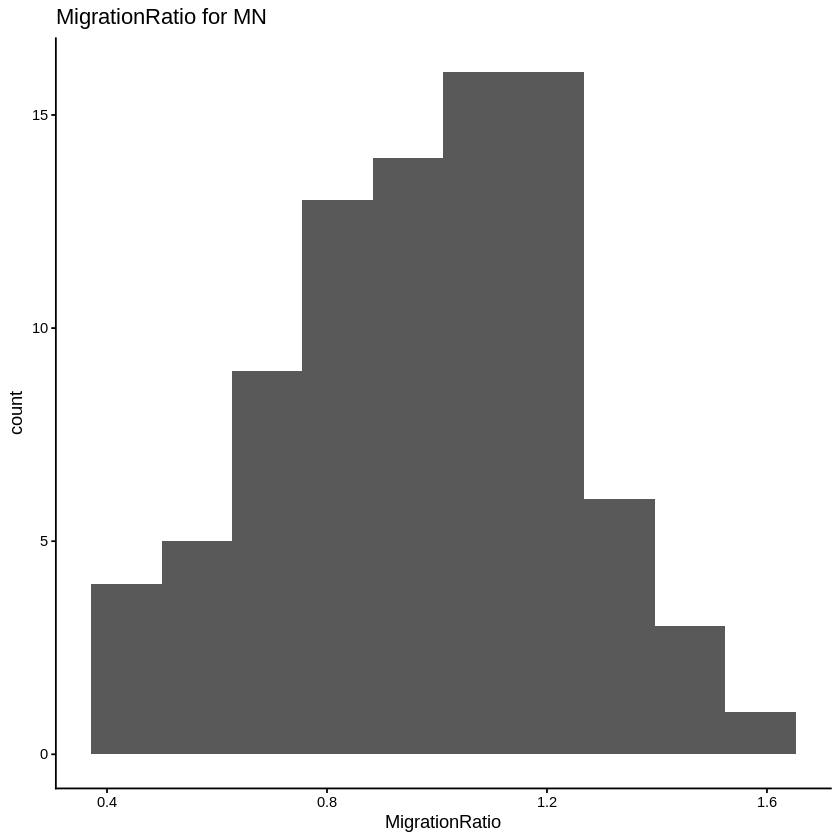

In [37]:
# Histogram of MigrationRatio
ggplot(data=MN_WI_MigrationData_withRatio_MNOnly, aes(x=MigrationRatio)) +
  geom_histogram(bins=10) +
   ggtitle("MigrationRatio for MN") +
  theme_classic()

Last is to identify any outliers

In [44]:
#Identification of Outlier for MN
(MN_WI_MigrationData_withRatio_MNOnly
 %>% mutate(
              LowSide_OutlierBoundary = (0.978 - 2 * 0.252),
              HighSide_OutlierBoundary = (0.978 + 2 * 0.252)
            )
 %>% mutate(
              Outlier_LowSide = ifelse(MigrationRatio < LowSide_OutlierBoundary, "Yes", "No"),
              Outlier_HighSide = ifelse(MigrationRatio > HighSide_OutlierBoundary, "Yes", "No")
          )
 %>% filter(Outlier_LowSide == "Yes" | Outlier_HighSide=="Yes")
 %>% select(State, County, MigrationRatio, Outlier_LowSide, Outlier_HighSide)
 %>% arrange(MigrationRatio)
)

State     County                 MigrationRatio Outlier_LowSide
1 Minnesota Watonwan County, MN    0.4351005      Yes            
2 Minnesota Red Lake County, MN    0.4679803      Yes            
3 Minnesota Koochiching County, MN 1.4953704      No             
4 Minnesota Beltrami County, MN    1.5880884      No             
  Outlier_HighSide
1 No              
2 No              
3 Yes             
4 Yes

## Analysis for WI

First, getting basic summary statistics

In [39]:
# Marginal Distribution
( MN_WI_MigrationData_withRatio_WIOnly
     %>% summarize(
                    Avg = mean(MigrationRatio),
                    'Standard Deviation' = sd(MigrationRatio),
                    Count = n()
                 )
)

Avg      Standard Deviation Count
1 1.105104 0.3084592          72

Next, getting a histogram of MigrationRatio

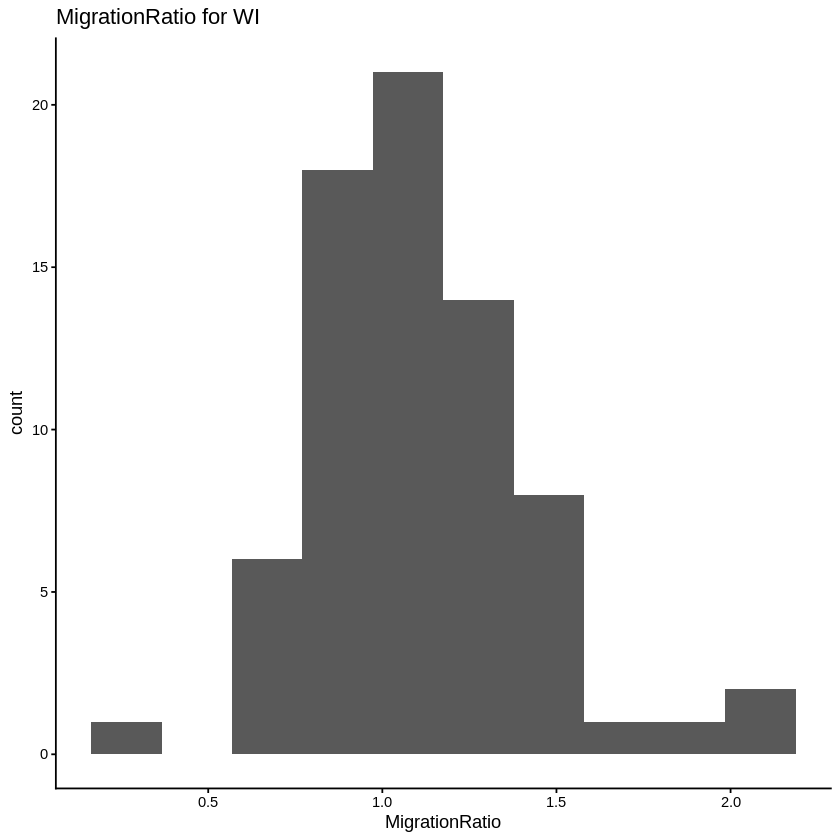

In [40]:
# Histogram of MigrationRatio
ggplot(data=MN_WI_MigrationData_withRatio_WIOnly, aes(x=MigrationRatio)) +
  geom_histogram(bins=10) +
   ggtitle("MigrationRatio for WI") +
  theme_classic()

Last is to identify any outliers

In [45]:
#Identification of Outlier for WI
(MN_WI_MigrationData_withRatio_WIOnly
 %>% mutate(
              LowSide_OutlierBoundary = (1.11 - 2 * 0.308),
              HighSide_OutlierBoundary = (1.11 + 2 * 0.308)
            )
 %>% mutate(
              Outlier_LowSide = ifelse(MigrationRatio < LowSide_OutlierBoundary, "Yes", "No"),
              Outlier_HighSide = ifelse(MigrationRatio > HighSide_OutlierBoundary, "Yes", "No")
          )
 %>% filter(Outlier_LowSide == "Yes" | Outlier_HighSide=="Yes")
 %>% select(State, County, MigrationRatio, Outlier_LowSide, Outlier_HighSide)
  %>% arrange(MigrationRatio)
)

State     County               MigrationRatio Outlier_LowSide
1 Wisconsin Menominee County, WI 0.2647887      Yes            
2 Wisconsin Florence County, WI  1.7828947      No             
3 Wisconsin Sawyer County, WI    2.0031153      No             
4 Wisconsin Dunn County, WI      2.0856918      No             
  Outlier_HighSide
1 No              
2 Yes             
3 Yes             
4 Yes


---



---

End of Document


